# Introdução

[Seaborn](https://seaborn.pydata.org/introduction.html) é uma biblioteca para a geração de gráficos em Python. De forma mais precisa, essa biblioteca facilita a criação de gráficos comuns em análises de dados, mas a biblioteca que faz o _trabalho sujo_ na parte dos gráficos é o a biblioteca [matplotlib](https://matplotlib.org/) que também vale a pena conhecer.

Vamos começar importando ela e a base de dados que usaremos de exemplo `Penguins`.




In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Análise visual de múltiplas variáveis

`Bill length` e `bill depth` são atributos relacionados ao bico do pinguim. Podemos ver qual a relação dos valores desses dois atributos entre as diferentes espécies usando um gráfico de dispersão. Vamos então colorir cada ponto de acordo com sua espécie. Podemos deixar o gráfico ainda mais rico, trocaremos o tipo do marcador do ponto no gráfico de acordo com o sexo do pinguim. Note que um gráfico de 2 dimensões está trazendo na verdade informações sobre 4 atributos da base de dados.
Para isso utilizaremos a função `relplot`. 

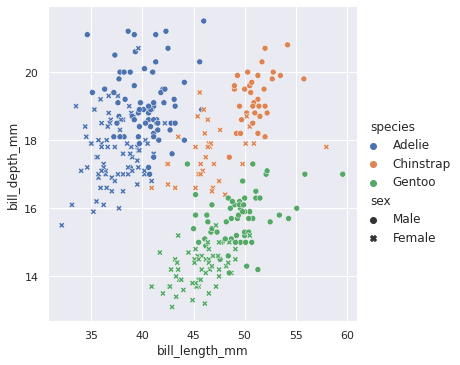

In [ ]:
#vamos usar o tema padrão, mas você pode explorar customizações
sns.set_theme()
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", style="sex")

Essa é apenas uma das possibilidades dessa função, você pode ver mais informações [aqui](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot).

Embora um gráfico desse formato seja muito útil e rico, às vezes gostaríamos de ter uma  melhor ideia de um atributo específico. Por exemplo, gostaríamos de ter uma ideia da distribuição de valores de `bill_length_mm` de acordo com a espécie. Essa informação está no gráfico, mas não tão fácil de ser analisada.
Poderíamos fazer a estimação de densidade em relação ao `bill_length_mm` para os dados de diferentes classes. Isso nos  geraria três gráficos de distribuição de densidade. Como ele é uma informação muito próximo ao último gráfico visto, é comum adicionarmos nos eixos esse tipo de informação. Note que ao isolar um atributo do gráfico 2d, estamos de certa forma fazendo uma projeção dos dados.
A função `joinplot` nos ajuda com isso.

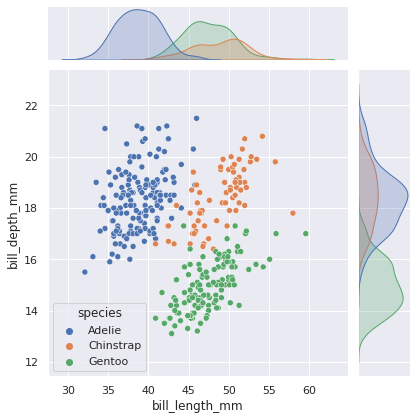

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

Sim, esses gráficos colados aos eixos são obtidos usando a técnica de estimação de densidade não paramétrica que vimos em aula :-)
No caso ele utiliza um _kernel gaussiano_, você pode ver mais detalhes [aqui](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

Embora esse último gráfico seja muito informativo, ainda temos uma certa dificuldade de analisarmos a distribuição conjunta entre `bill_length_mm` e `bill_depth_mm` para cada espécie. Raramente usamos gráficos 3d para as análises, então uma forma de visualizar a distribuição conjunta seria o gráfico de contorno. Isso é bem fácil de fazer no seaborn:

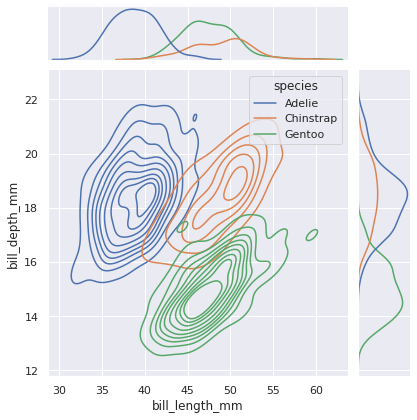

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Essas são apenas algumas das opções básicas do `jointplot`, você pode ver mais opções [aqui](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot).

# Boxplot e sua variação mais conhecida

Quando analisamos uma base de dados como um todo, é sempre importante olhar as relações entre os diferentes atributos. No entanto, algumas vezes queremos olhar a distribuição dos valores de um atributo de forma bastante sumarizada. Como vimos, o _boxplot_ é uma boa ferramenta para apresentar essa sumarização de forma gráfica.
Já vimos como gerar uma _boxplot_ por meio do `Pandas` (que na verdade usa `matplotlib` também). Vamos ver um exemplo de como fazê-lo no seaborn agora.
Continuaremos olhando o atributo `bill_length_mm_` para as diferentes espécies.

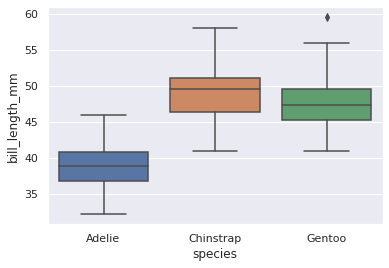

In [ ]:
sns.boxplot(data=penguins, x="species", y="bill_length_mm")

Mesmo neste formato sumarizado a intersecção entre as espécies `Chinstrap` e `Gentoo` fica evidente.
Uma forma alternativa de boxplot, que muitos gostam, é chamada de `violinplot`.
A ideia é trocar o formato de caixa por um formato de violino (não diga, né? :-D), em que a região mais larga seja a região onde tem mais pontos. Se você pensou densidade ou estimação de densidade não paramétrica, pensou certo :-).
Abaixo tem uma versão do `violinplot` com as marcações dos quartis para facilitar a comparação com o boxplot acima.

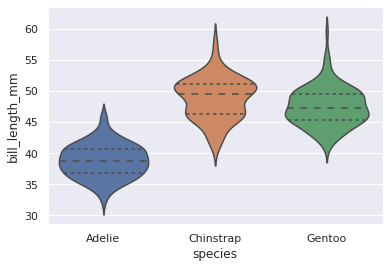

In [ ]:
ax = sns.violinplot(x="species", y="bill_length_mm", data=penguins, col=0.8, inner = "quartile" )

O formato mais comum de se exibir um `violinplot` na verdade é colocando os pontos sobre ele, sem nenhuma marcação de quartis, conforme abaixo:

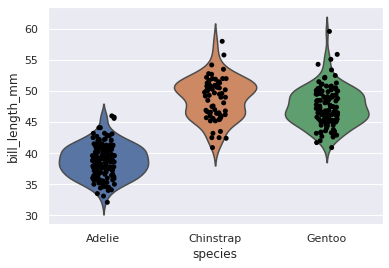

In [ ]:
ax = sns.violinplot(x="species", y="bill_length_mm", data=penguins, col=0.8, inner=None)
ax = sns.stripplot(x="species", y="bill_length_mm", color="black", data=penguins)

Muitas das escolhas envolvidas em gráficos são questões de gosto.
Mas, algumas regras básicas devem servir de guia:
- adicione componentes em um gráfico apenas se eles trouxerem informações adicionais;
- evite cores que pessoas com daltonismo tenham dificuldades (pode ler mais sobre isso [aqui](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40);
- qual informação está disposta em cada eixo do seu gráfico não deve ser um mistério, por isso deixe claro com rótulos nos eixos.